In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("cleaned_titanic.csv")

In [3]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


# Label Encoding

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.


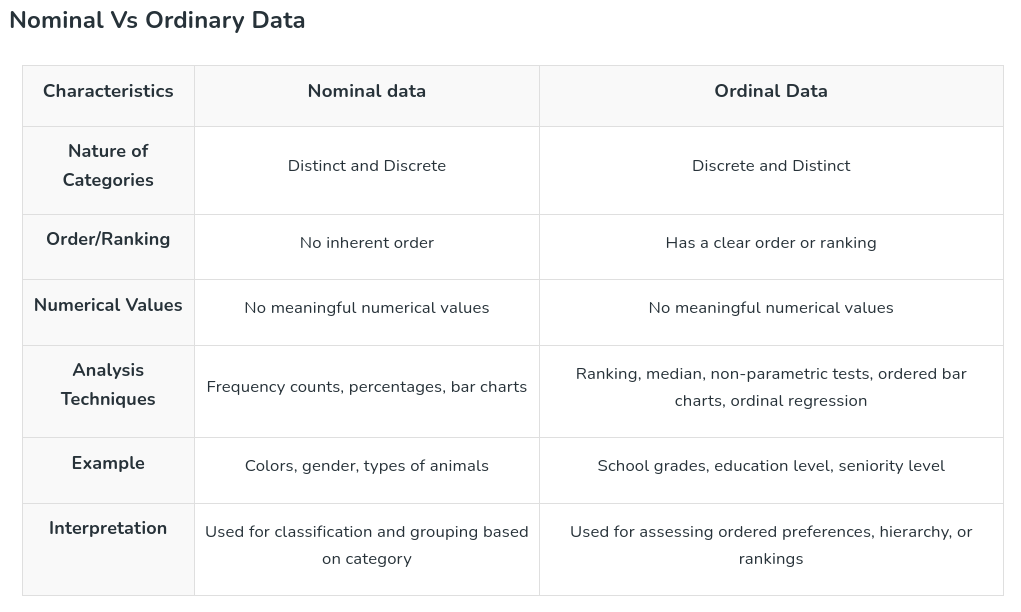

### Nominal Data

Data without natural order

In [5]:
titanic_df.Sex #< Nominal Data

0        male
1      female
2      female
3      female
4        male
        ...  
862      male
863    female
864    female
865      male
866      male
Name: Sex, Length: 867, dtype: object

### One- Hot Encoding

In [8]:
# Pandas
pd.get_dummies(titanic_df, columns=["Sex"], dtype=int).head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,S,0,1


In [13]:
# Sci-kit learn
# !pip install scikit-learn

from sklearn.preprocessing import OneHotEncoder

In [20]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_gender = one_hot_encoder.fit_transform(titanic_df[["Sex"]])

In [21]:
encoded_gender

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], shape=(867, 2))

In [26]:
one_hot_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [27]:
one_hot_encoder.inverse_transform(
    [[1,0],
     [0,1]]
)

array([['female'],
       ['male']], dtype=object)

In [30]:
df  =pd.DataFrame(encoded_gender, columns=one_hot_encoder.categories_[0])
titanic_df = pd.concat([titanic_df, df], axis = 1)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,1.0,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0.0,1.0


In [31]:
# Pandas
pd.get_dummies(titanic_df, columns=["Embarked"], dtype=int).head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0.0,1.0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,1.0,0.0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,1.0,0.0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,1.0,0.0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0.0,1.0,0,0,1


In [62]:
# Sklearn
one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_data = one_hot_encoder.fit_transform(titanic_df[["Sex", "Embarked"]])

In [63]:
encoded_data

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]], shape=(867, 5))

In [36]:
one_hot_encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

**Ordinal Data**

Data with order

In [45]:
titanic_df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
862    S
863    S
864    S
865    C
866    Q
Name: Embarked, Length: 867, dtype: object

In [57]:
# Pandas

titanic_df["Embarked_enc"], rule = titanic_df.Embarked.factorize(sort = True)

In [58]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Embarked_enc
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0.0,1.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,1.0,0.0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1.0,0.0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,1.0,0.0,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0.0,1.0,2


In [59]:
rule

Index(['C', 'Q', 'S'], dtype='object')

In [65]:
# Sklearn

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_e = label_encoder.fit_transform(titanic_df["Embarked"])

In [66]:
encoded_e

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0,

In [67]:
label_encoder.classes_

array(['C', 'Q', 'S'], dtype=object)

In [70]:
label_encoder.inverse_transform(
    [1,2,0,1,2]
)

array(['Q', 'S', 'C', 'Q', 'S'], dtype=object)

In [71]:
# FInal

In [78]:
final_df = titanic_df.drop(["Name","Ticket", "Sex","Embarked"], axis =1)

In [80]:
final_df.to_csv("final_data_titanic.csv", index = False)